# Création d'un dataframe

In [21]:


import pandas as pd
import numpy as np
data = pd.read_csv("notes.csv", index_col=None, delimiter=";")
data


,Unnamed: 0,maths,anglais,moyenne,coefM,coefA
0,0,17.0,18.0,69.5,5.0,3.0
1,1,17.0,15.0,65.0,5.0,3.0
2,2,14.0,18.0,62.0,5.0,3.0
3,3,10.0,15.0,47.5,5.0,3.0
4,4,10.0,12.0,43.0,5.0,3.0
5,5,8.0,14.0,41.0,5.0,3.0


In [22]:

data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [24]:
data[["coefA"]] = data[["coefA"]].astype(int)
data[["coefM"]] = data[["coefM"]].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   maths    6 non-null      float64
 1   anglais  6 non-null      float64
 2   moyenne  6 non-null      float64
 3   coefM    6 non-null      int32  
 4   coefA    6 non-null      int32  
dtypes: float64(3), int32(2)
memory usage: 324.0 bytes


In [25]:
# Describe all columns of our dataframe
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
maths,6.0,12.666667,3.881580,8.0,10.000,12.00,16.25,17.0
anglais,6.0,15.333333,2.338090,12.0,14.250,15.00,17.25,18.0
moyenne,6.0,54.666667,12.286849,41.0,44.125,54.75,64.25,69.5
coefM,6.0,5.000000,0.000000,5.0,5.000,5.00,5.00,5.0
coefA,6.0,3.000000,0.000000,3.0,3.000,3.00,3.00,3.0


# Sort by decreasing moyenne

In [28]:

def calculate_moyenne(row):
    
    row.moyenne = (row.maths * row.coefM  + row.anglais * row.coefA ) / 2
    row.rang = np.nan
    return row

data["rang"] = 0
data = data.apply(calculate_moyenne, axis='columns')
data = data.sort_values(["moyenne"], ascending=False)
data


,maths,anglais,moyenne,coefM,coefA,rang
0,17.0,18.0,69.5,5.0,3.0,NaN
1,17.0,15.0,65.0,5.0,3.0,NaN
2,14.0,18.0,62.0,5.0,3.0,NaN
3,10.0,15.0,47.5,5.0,3.0,NaN
4,10.0,12.0,43.0,5.0,3.0,NaN
5,8.0,14.0,41.0,5.0,3.0,NaN


In [32]:
range = 0
def calculate_range(row):
    global range
    range += 1
    row.rang = range
    return row

data.apply(calculate_range, axis='columns')

# data.rang = data.rang.apply(lambda x: str(x).replace(".0", ""))
# data.rang = data.rang.astype('str')
data["rang"] = data["rang"].astype(int)
data



,maths,anglais,moyenne,coefM,coefA,rang
0,17.0,18.0,69.5,5.0,3.0,1
1,17.0,15.0,65.0,5.0,3.0,2
2,14.0,18.0,62.0,5.0,3.0,3
3,10.0,15.0,47.5,5.0,3.0,4
4,10.0,12.0,43.0,5.0,3.0,5
5,8.0,14.0,41.0,5.0,3.0,6


# Set index du dataframe

In [52]:
data.set_index("rang")
data.index.name = "Rang des élèves"
data.head()

,maths,anglais,moyenne,coefM,coefA,rang
Rang des élèves,,,,,,
0,17.0,18.0,69.5,5.0,3.0,1
1,17.0,15.0,65.0,5.0,3.0,2
2,14.0,18.0,62.0,5.0,3.0,3
3,10.0,15.0,47.5,5.0,3.0,4
4,10.0,12.0,43.0,5.0,3.0,5


In [59]:
data.head().groupby(["maths"], as_index=False)["moyenne"].sum()

,maths,moyenne
0,10.0,90.5
1,14.0,62.0
2,17.0,134.5


# Sauvegarde du fichier traité

In [60]:

data.to_csv("notes.csv", sep=";", columns=["maths", "anglais", "moyenne", "coefM","coefA"])

# Concaténation de data frames

In [61]:
note = pd.DataFrame([{
    "maths": 17,
    "anglais": 18,
    "moyenne": 0,
    "rang": np.nan
}])
note

,maths,anglais,moyenne,rang
0,17,18,0,NaN


In [101]:
# Ignorer les indexes lors de la concatenation
newdata = pd.concat([data, note], ignore_index=True)
newdata


,maths,anglais,moyenne,coefM,coefA,rang
0,17.0,18.0,69.5,5.0,3.0,1.0
1,17.0,15.0,65.0,5.0,3.0,2.0
2,14.0,18.0,62.0,5.0,3.0,3.0
3,10.0,15.0,47.5,5.0,3.0,4.0
4,10.0,12.0,43.0,5.0,3.0,5.0
5,8.0,14.0,41.0,5.0,3.0,6.0
6,17.0,18.0,0.0,NaN,NaN,NaN


# Suppression des valeurs nulle

In [103]:
newdata.dropna(axis=0, inplace=True, thresh=4)
newdata

,maths,anglais,moyenne,coefM,coefA,rang
0,17.0,18.0,69.5,5.0,3.0,1.0
1,17.0,15.0,65.0,5.0,3.0,2.0
2,14.0,18.0,62.0,5.0,3.0,3.0
3,10.0,15.0,47.5,5.0,3.0,4.0
4,10.0,12.0,43.0,5.0,3.0,5.0
5,8.0,14.0,41.0,5.0,3.0,6.0


In [152]:
df = pd.read_csv("students_notes.csv", delimiter=';')
df.set_index("eleves", inplace=True)
df.index.name = "Noms des élèves"
df.head(10)

,id,maths,coefM,anglais,coefA,histoire,coefh,geographie,coefG,ecm,coefEcm,physique,coefP,informatique,coefI,chimie,coefC,francais,coefF
Noms des élèves,,,,,,,,,,,,,,,,,,,
Frazer Foxten,1,NaN,5,NaN,3,NaN,2,NaN,2,NaN,1,NaN,3,NaN,2,NaN,2,NaN,2
Aubree Starte,2,7.0,5,15.0,3,0.0,2,19.0,2,0.0,1,11.0,3,12.0,2,10.0,2,19.0,2
Georgine Gonzalo,3,15.0,5,10.0,3,14.0,2,10.0,2,16.0,1,0.0,3,11.0,2,0.0,2,19.0,2
Trenton Care,4,15.0,5,3.0,3,5.0,2,13.0,2,3.0,1,7.0,3,8.0,2,9.0,2,12.0,2
Binky Corey,5,17.0,5,9.0,3,1.0,2,11.0,2,4.0,1,9.0,3,9.0,2,8.0,2,8.0,2
Connie Hull,6,2.0,5,7.0,3,18.0,2,13.0,2,13.0,1,4.0,3,20.0,2,19.0,2,16.0,2
Ursulina Tsar,7,NaN,5,NaN,3,NaN,2,NaN,2,NaN,1,NaN,3,NaN,2,NaN,2,NaN,2
Clair Ragg,8,0.0,5,0.0,3,16.0,2,1.0,2,18.0,1,18.0,3,6.0,2,10.0,2,20.0,2
Bernelle Smullin,9,3.0,5,18.0,3,19.0,2,2.0,2,1.0,1,0.0,3,15.0,2,0.0,2,19.0,2


# Supression des valeurs manquantes

In [166]:

dx = df[0: 10].copy()

In [167]:
dx.dropna(axis=0, inplace=True)
dx

,id,maths,coefM,anglais,coefA,histoire,coefh,geographie,coefG,ecm,coefEcm,physique,coefP,informatique,coefI,chimie,coefC,francais,coefF
Noms des élèves,,,,,,,,,,,,,,,,,,,
Aubree Starte,2,7.0,5,15.0,3,0.0,2,19.0,2,0.0,1,11.0,3,12.0,2,10.0,2,19.0,2
Georgine Gonzalo,3,15.0,5,10.0,3,14.0,2,10.0,2,16.0,1,0.0,3,11.0,2,0.0,2,19.0,2
Trenton Care,4,15.0,5,3.0,3,5.0,2,13.0,2,3.0,1,7.0,3,8.0,2,9.0,2,12.0,2
Binky Corey,5,17.0,5,9.0,3,1.0,2,11.0,2,4.0,1,9.0,3,9.0,2,8.0,2,8.0,2
Connie Hull,6,2.0,5,7.0,3,18.0,2,13.0,2,13.0,1,4.0,3,20.0,2,19.0,2,16.0,2
Clair Ragg,8,0.0,5,0.0,3,16.0,2,1.0,2,18.0,1,18.0,3,6.0,2,10.0,2,20.0,2
Bernelle Smullin,9,3.0,5,18.0,3,19.0,2,2.0,2,1.0,1,0.0,3,15.0,2,0.0,2,19.0,2
Karrie Blune,10,7.0,5,17.0,3,3.0,2,15.0,2,16.0,1,10.0,3,14.0,2,3.0,2,15.0,2


In [165]:
dx.isnull().sum().to_frame()

,0
id,0
maths,0
coefM,0
anglais,0
coefA,0
histoire,0
coefh,0
geographie,0
coefG,0
ecm,0


In [170]:
df.isnull().sum()

id                0
maths           219
coefM             0
anglais         219
coefA             0
histoire        219
coefh             0
geographie      219
coefG             0
ecm             219
coefEcm           0
physique        219
coefP             0
informatique    219
coefI             0
chimie          219
coefC             0
francais        219
coefF             0
dtype: int64

In [108]:
df.loc[["Aubree Starte", "Trenton Care"]]

,id,maths,coefM,anglais,coefA,histoire,coefh,geographie,coefG,ecm,coefEcm,physique,coefP,informatique,coefI,chimie,coefC,francais,coefF
Noms des élèves,,,,,,,,,,,,,,,,,,,
Aubree Starte,2,7.0,5,15.0,3,0.0,2,19.0,2,0.0,1,11.0,3,12.0,2,10.0,2,19.0,2
Trenton Care,4,15.0,5,3.0,3,5.0,2,13.0,2,3.0,1,7.0,3,8.0,2,9.0,2,12.0,2


# Rechercher les etudiants ayant au moins 15 en Maths

In [51]:
filter_maths = df.maths >= 15

meilleurs_maths = df[filter_maths]
meilleurs_maths.head()

,id,maths,coefM,anglais,coefA,histoire,coefh,geographie,coefG,ecm,coefEcm,physique,coefP,informatique,coefI,chimie,coefC,francais,coefF
eleves,,,,,,,,,,,,,,,,,,,
Georgine Gonzalo,3,15.0,5,10.0,3,14.0,2,10.0,2,16.0,1,0.0,3,11.0,2,0.0,2,19.0,2
Trenton Care,4,15.0,5,3.0,3,5.0,2,13.0,2,3.0,1,7.0,3,8.0,2,9.0,2,12.0,2
Binky Corey,5,17.0,5,9.0,3,1.0,2,11.0,2,4.0,1,9.0,3,9.0,2,8.0,2,8.0,2
Matelda Mitkin,11,17.0,5,5.0,3,4.0,2,7.0,2,17.0,1,19.0,3,10.0,2,8.0,2,3.0,2
Kristina Strelitzki,12,17.0,5,8.0,3,15.0,2,0.0,2,1.0,1,18.0,3,0.0,2,19.0,2,7.0,2


In [52]:
# Meilleurs notes en Anglais et en maths
filter_anglais = df.anglais >= 15
meilleurs_anglais = df[filter_anglais]
meilleurs_anglais.head()

,id,maths,coefM,anglais,coefA,histoire,coefh,geographie,coefG,ecm,coefEcm,physique,coefP,informatique,coefI,chimie,coefC,francais,coefF
eleves,,,,,,,,,,,,,,,,,,,
Aubree Starte,2,7.0,5,15.0,3,0.0,2,19.0,2,0.0,1,11.0,3,12.0,2,10.0,2,19.0,2
Bernelle Smullin,9,3.0,5,18.0,3,19.0,2,2.0,2,1.0,1,0.0,3,15.0,2,0.0,2,19.0,2
Karrie Blune,10,7.0,5,17.0,3,3.0,2,15.0,2,16.0,1,10.0,3,14.0,2,3.0,2,15.0,2
Whit Saice,14,7.0,5,20.0,3,8.0,2,18.0,2,12.0,1,20.0,3,3.0,2,13.0,2,18.0,2
Euphemia Kienzle,16,8.0,5,19.0,3,1.0,2,2.0,2,4.0,1,0.0,3,10.0,2,20.0,2,16.0,2


# Liste de étudiants qui ont une meilleure note en anglais et en mathématique

In [53]:

maths_anglais = df[(filter_maths) & (filter_anglais)][["anglais", "maths"]]
maths_anglais

,anglais,maths
eleves,,
Renae Rabl,15.0,15.0
Broddie Sahlstrom,16.0,16.0
Nealson Bickle,20.0,18.0
Marcellus Toomer,18.0,19.0
Emogene Ambrus,16.0,16.0
...,...,...
Stillman Clout,16.0,19.0
Andros Jovicic,17.0,18.0
Julianna Kitley,20.0,18.0


In [54]:
maths_anglais.filter(regex='ths$', axis=1)

,maths
eleves,
Renae Rabl,15.0
Broddie Sahlstrom,16.0
Nealson Bickle,18.0
Marcellus Toomer,19.0
Emogene Ambrus,16.0
...,...
Stillman Clout,19.0
Andros Jovicic,18.0
Julianna Kitley,18.0


In [55]:
maths_anglais.filter(items=['anglais', 'maths'])

,anglais,maths
eleves,,
Renae Rabl,15.0,15.0
Broddie Sahlstrom,16.0,16.0
Nealson Bickle,20.0,18.0
Marcellus Toomer,18.0,19.0
Emogene Ambrus,16.0,16.0
...,...,...
Stillman Clout,16.0,19.0
Andros Jovicic,17.0,18.0
Julianna Kitley,20.0,18.0


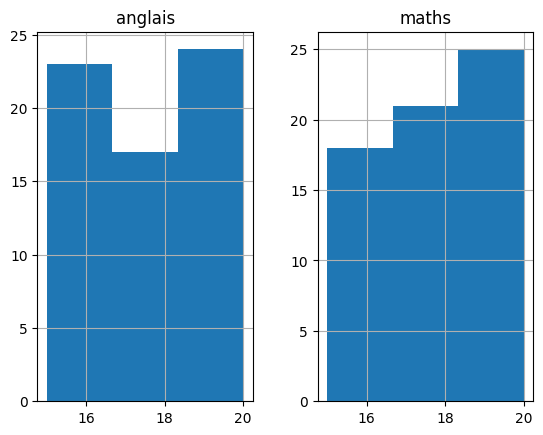

In [56]:
hist  = maths_anglais.hist(bins=3)

In [57]:
maths_anglais[maths_anglais.maths == 20]["maths"].value_counts()

maths
20.0    12
Name: count, dtype: int64

<Axes: xlabel='eleves'>

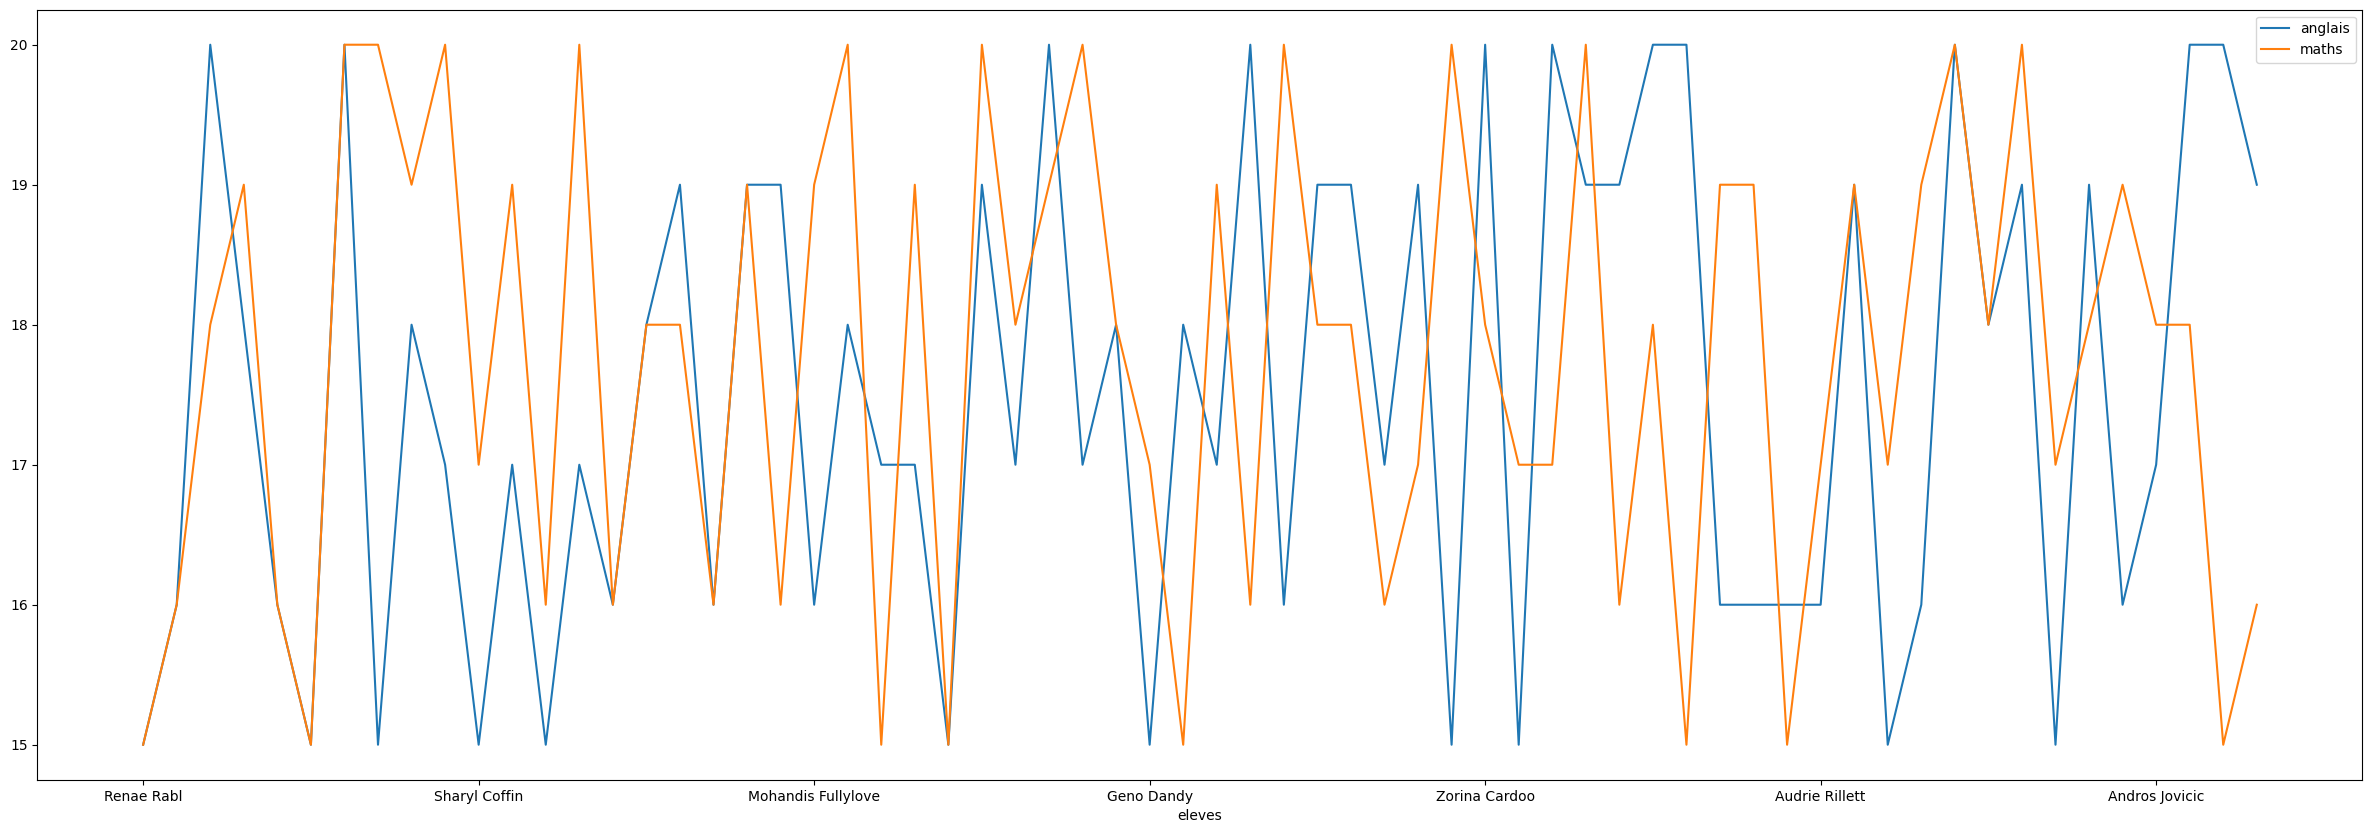

In [23]:
good_maths = maths_anglais[maths_anglais.maths >= 10]
good_maths.plot(figsize=[30, 10])

In [58]:
good_maths.sort_values(by="anglais", ascending=True)

,anglais,maths
eleves,,
Renae Rabl,15.0,15.0
Geno Dandy,15.0,17.0
Johan Nicolson,15.0,20.0
Cris McGruar,15.0,17.0
Leyla Totterdell,15.0,15.0
...,...,...
Kinsley Eborn,20.0,20.0
Nanny Wenderoth,20.0,15.0
Nealson Bickle,20.0,18.0


In [59]:
df.loc[((df.francais >= 5) & (df.maths == 20) & (df.anglais == 20) ), ["maths","anglais", "francais"]]

,maths,anglais,francais
eleves,,,
Kinsley Eborn,20.0,20.0,6.0


In [132]:
df

,id,maths,coefM,anglais,coefA,histoire,coefh,geographie,coefG,ecm,coefEcm,physique,coefP,informatique,coefI,chimie,coefC,francais,coefF
eleves,,,,,,,,,,,,,,,,,,,
Frazer Foxten,1,NaN,5,NaN,3,NaN,2,NaN,2,NaN,1,NaN,3,NaN,2,NaN,2,NaN,2
Aubree Starte,2,7.0,5,15.0,3,0.0,2,19.0,2,0.0,1,11.0,3,12.0,2,10.0,2,19.0,2
Georgine Gonzalo,3,15.0,5,10.0,3,14.0,2,10.0,2,16.0,1,0.0,3,11.0,2,0.0,2,19.0,2
Trenton Care,4,15.0,5,3.0,3,5.0,2,13.0,2,3.0,1,7.0,3,8.0,2,9.0,2,12.0,2
Binky Corey,5,17.0,5,9.0,3,1.0,2,11.0,2,4.0,1,9.0,3,9.0,2,8.0,2,8.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Morley Andrzejak,996,3.0,5,11.0,3,10.0,2,11.0,2,11.0,1,13.0,3,10.0,2,16.0,2,10.0,2
Ester Deschelle,997,14.0,5,1.0,3,8.0,2,13.0,2,3.0,1,15.0,3,10.0,2,0.0,2,7.0,2
Quincey Shervil,998,16.0,5,19.0,3,7.0,2,10.0,2,17.0,1,2.0,3,6.0,2,1.0,2,11.0,2


In [60]:
df.dropna(subset=["maths", "anglais"], axis=0)

,id,maths,coefM,anglais,coefA,histoire,coefh,geographie,coefG,ecm,coefEcm,physique,coefP,informatique,coefI,chimie,coefC,francais,coefF
eleves,,,,,,,,,,,,,,,,,,,
Aubree Starte,2,7.0,5,15.0,3,0.0,2,19.0,2,0.0,1,11.0,3,12.0,2,10.0,2,19.0,2
Georgine Gonzalo,3,15.0,5,10.0,3,14.0,2,10.0,2,16.0,1,0.0,3,11.0,2,0.0,2,19.0,2
Trenton Care,4,15.0,5,3.0,3,5.0,2,13.0,2,3.0,1,7.0,3,8.0,2,9.0,2,12.0,2
Binky Corey,5,17.0,5,9.0,3,1.0,2,11.0,2,4.0,1,9.0,3,9.0,2,8.0,2,8.0,2
Connie Hull,6,2.0,5,7.0,3,18.0,2,13.0,2,13.0,1,4.0,3,20.0,2,19.0,2,16.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Morley Andrzejak,996,3.0,5,11.0,3,10.0,2,11.0,2,11.0,1,13.0,3,10.0,2,16.0,2,10.0,2
Ester Deschelle,997,14.0,5,1.0,3,8.0,2,13.0,2,3.0,1,15.0,3,10.0,2,0.0,2,7.0,2
Quincey Shervil,998,16.0,5,19.0,3,7.0,2,10.0,2,17.0,1,2.0,3,6.0,2,1.0,2,11.0,2


In [90]:
df.to_csv("students_notes.csv", sep=";")

In [61]:
maths_anglais

,anglais,maths
eleves,,
Renae Rabl,15.0,15.0
Broddie Sahlstrom,16.0,16.0
Nealson Bickle,20.0,18.0
Marcellus Toomer,18.0,19.0
Emogene Ambrus,16.0,16.0
...,...,...
Stillman Clout,16.0,19.0
Andros Jovicic,17.0,18.0
Julianna Kitley,20.0,18.0


<Axes: >

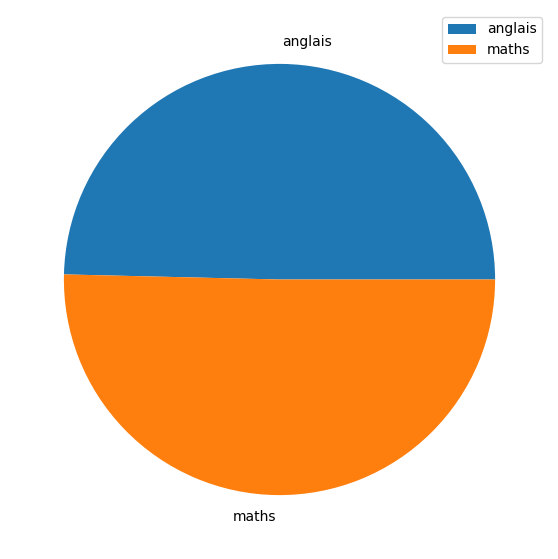

In [63]:
maths_anglais.sum().plot.pie(legend=True, figsize=[7, 7])

In [27]:
maths_anglais.maths.sum()

1137.0

In [28]:
maths_anglais.anglais.sum()

1120.0

In [72]:
histogramme = df[(df["maths"] < 8) & (df["anglais"] > 15)][["maths", "anglais"]]
histogramme.head()

,maths,anglais
eleves,,
Bernelle Smullin,3.0,18.0
Karrie Blune,7.0,17.0
Whit Saice,7.0,20.0
Bar Ruffles,5.0,19.0
Clementia Newcomen,1.0,18.0


<Axes: >

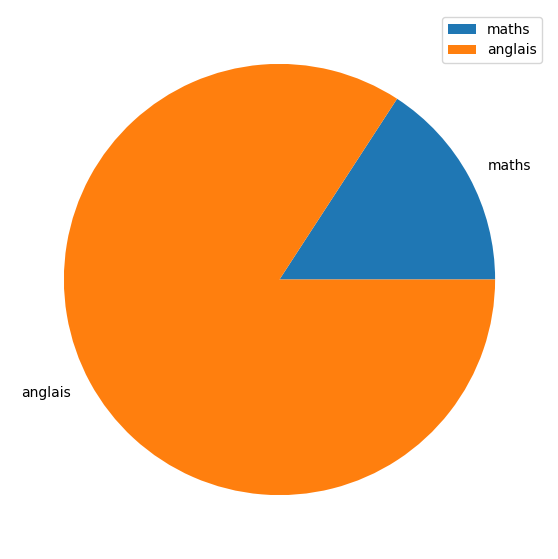

In [73]:
histogramme.sum().plot.pie(legend = True, figsize=[7, 7])
# histogramme.sum().plot.pie(legend=True, figsize=[7, 7])

In [36]:
df

,id,maths,coefM,anglais,coefA,histoire,coefh,geographie,coefG,ecm,coefEcm,physique,coefP,informatique,coefI,chimie,coefC,francais,coefF
eleves,,,,,,,,,,,,,,,,,,,
Frazer Foxten,1,NaN,5,NaN,3,NaN,2,NaN,2,NaN,1,NaN,3,NaN,2,NaN,2,NaN,2
Aubree Starte,2,7.0,5,15.0,3,0.0,2,19.0,2,0.0,1,11.0,3,12.0,2,10.0,2,19.0,2
Georgine Gonzalo,3,15.0,5,10.0,3,14.0,2,10.0,2,16.0,1,0.0,3,11.0,2,0.0,2,19.0,2
Trenton Care,4,15.0,5,3.0,3,5.0,2,13.0,2,3.0,1,7.0,3,8.0,2,9.0,2,12.0,2
Binky Corey,5,17.0,5,9.0,3,1.0,2,11.0,2,4.0,1,9.0,3,9.0,2,8.0,2,8.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Morley Andrzejak,996,3.0,5,11.0,3,10.0,2,11.0,2,11.0,1,13.0,3,10.0,2,16.0,2,10.0,2
Ester Deschelle,997,14.0,5,1.0,3,8.0,2,13.0,2,3.0,1,15.0,3,10.0,2,0.0,2,7.0,2
Quincey Shervil,998,16.0,5,19.0,3,7.0,2,10.0,2,17.0,1,2.0,3,6.0,2,1.0,2,11.0,2


In [44]:
histogramme.to_csv("test1.csv", sep=";")

<Axes: >

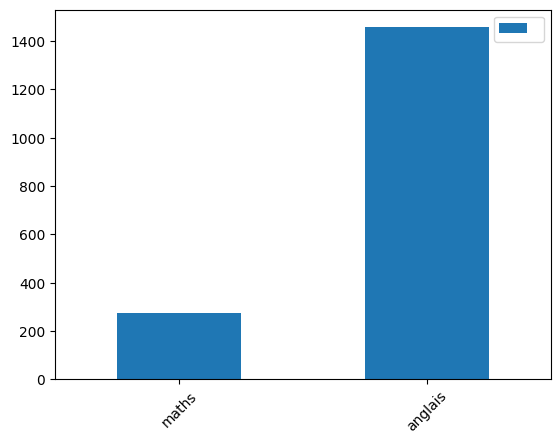

In [79]:
histogramme.sum().plot.bar(rot=45, legend=True)

In [80]:
histogramme.maths.sum()

274.0

In [82]:
histogramme.anglais.sum()

1458.0

In [6]:
notes = df[["maths", "anglais", "francais", "physique", "chimie", "ecm"]]

# Diagramme circulaire

<Axes: >

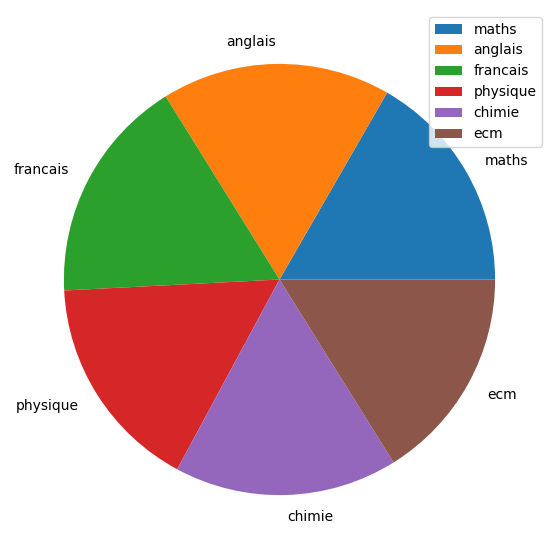

In [102]:
notes.sum().plot.pie(legend=True, figsize=[7, 7])

# Diagramme a bande

<Axes: xlabel='Matières', ylabel='Somme des notes'>

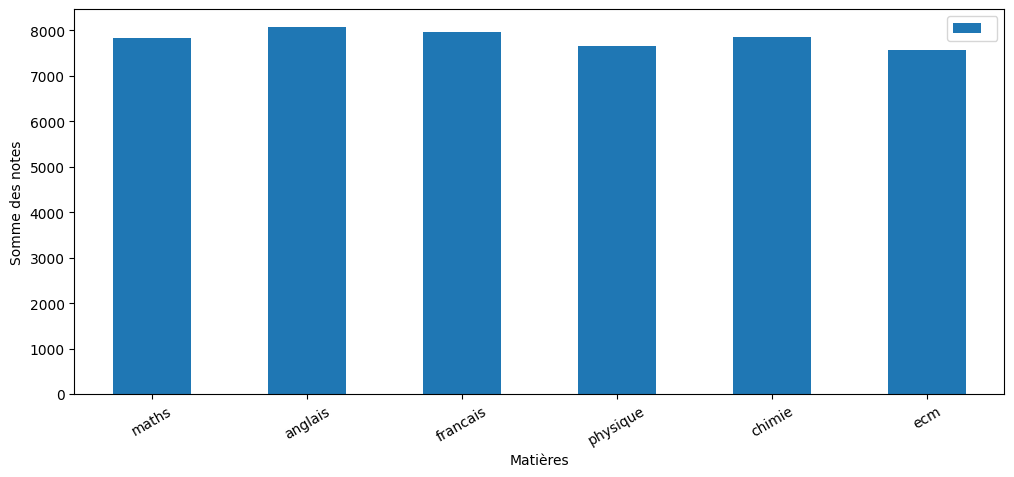

In [7]:
notes.sum().plot.bar(figsize=[12, 5], legend=True, rot=30, xlabel="Matières", ylabel="Somme des notes")

# Tracer d'une coube représentant les notes des étudiants

<Axes: xlabel='Matières', ylabel='Somme des notes'>

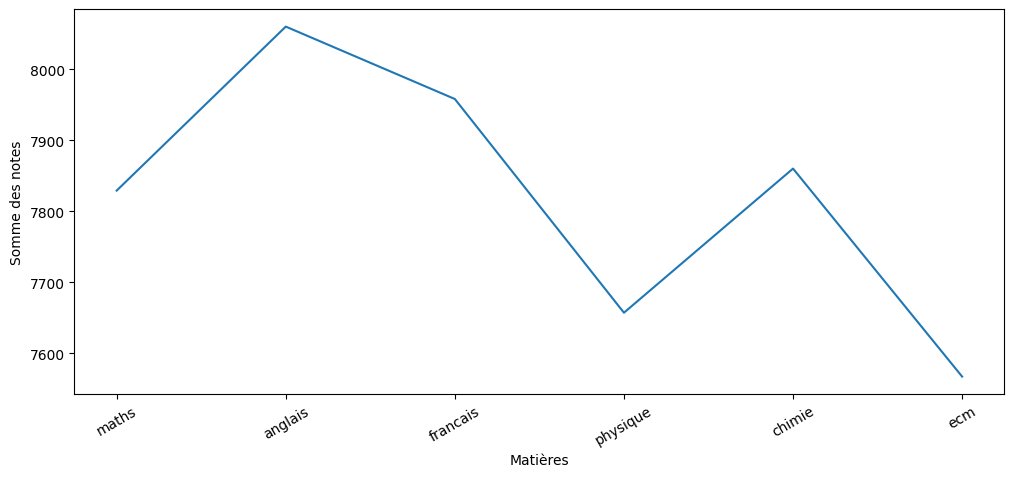

In [16]:
notes.sum().plot(figsize=[12, 5], rot=30, kind="line", x="maths", y="anglais", xlabel="Matières", ylabel="Somme des notes")